***IMPORT DATASET FROM GOOGLE DRIVE***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***IMPORT*** ***LIBRARIES***

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import tensorflow as tf
from PIL import Image
from numpy import asarray
from keras import applications
from tensorflow.keras import layers
from tensorflow.keras import Model
from scipy import interp
from itertools import cycle
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
directory = '/content/drive/MyDrive/BrainTumor3'

***PREPROCESSING*** ***DATA***

In [ ]:
File=[]
for file in os.listdir(directory):
    File+=[file]
print(File)

['pituitary_tumor', 'meningioma_tumor', 'glioma_tumor', 'no_tumor']


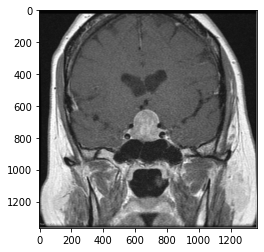

In [ ]:
directoryShow = "/content/drive/MyDrive/BrainTumor3/pituitary_tumor/p (133).jpg"
img = mpimg.imread(directoryShow)
imgplot = plt.imshow(img)
plt.show()

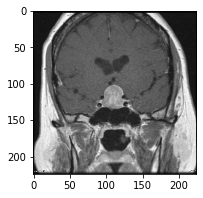

In [ ]:
#img = Image.open(directory)
#img.thumbnail((224, 224))  # resizes image in-place

#Visualisasi citra yang diresize
img_resize = load_img(directoryShow, grayscale=False, color_mode='rgb', target_size=(224,224))
plt.figure(figsize=(3,3))
imgplot = plt.imshow(img_resize)

In [ ]:
# Mengubah gambar menjadi array
image1 = img_to_array(img_resize)

In [ ]:
# Menampilkan array
image1

array([[[ 8.,  8.,  8.],
        [ 7.,  7.,  7.],
        [ 7.,  7.,  7.],
        ...,
        [ 7.,  7.,  7.],
        [ 7.,  7.,  7.],
        [ 2.,  2.,  2.]],

       [[ 7.,  7.,  7.],
        [ 6.,  6.,  6.],
        [ 6.,  6.,  6.],
        ...,
        [ 6.,  6.,  6.],
        [ 6.,  6.,  6.],
        [ 5.,  5.,  5.]],

       [[ 7.,  7.,  7.],
        [ 6.,  6.,  6.],
        [ 6.,  6.,  6.],
        ...,
        [ 6.,  6.,  6.],
        [ 6.,  6.,  6.],
        [ 5.,  5.,  5.]],

       ...,

       [[16., 16., 16.],
        [20., 20., 20.],
        [20., 20., 20.],
        ...,
        [23., 23., 23.],
        [17., 17., 17.],
        [13., 13., 13.]],

       [[10., 10., 10.],
        [13., 13., 13.],
        [13., 13., 13.],
        ...,
        [14., 14., 14.],
        [ 9.,  9.,  9.],
        [11., 11., 11.]],

       [[ 6.,  6.,  6.],
        [ 8.,  8.,  8.],
        [ 8.,  8.,  8.],
        ...,
        [ 9.,  9.,  9.],
        [ 8.,  8.,  8.],
        [ 1.,  1.,  1.]]

In [ ]:
np.argmax(image1)

3507

In [ ]:
# Melakukan normalisasi
img_norm = image1/255.0

In [ ]:
# Menampilkan array hasil normalisasi
img_norm

array([[[0.03137255, 0.03137255, 0.03137255],
        [0.02745098, 0.02745098, 0.02745098],
        [0.02745098, 0.02745098, 0.02745098],
        ...,
        [0.02745098, 0.02745098, 0.02745098],
        [0.02745098, 0.02745098, 0.02745098],
        [0.00784314, 0.00784314, 0.00784314]],

       [[0.02745098, 0.02745098, 0.02745098],
        [0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941],
        ...,
        [0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941],
        [0.01960784, 0.01960784, 0.01960784]],

       [[0.02745098, 0.02745098, 0.02745098],
        [0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941],
        ...,
        [0.02352941, 0.02352941, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941],
        [0.01960784, 0.01960784, 0.01960784]],

       ...,

       [[0.0627451 , 0.0627451 , 0.0627451 ],
        [0.07843138, 0.07843138, 0.07843138],
        [0.07843138, 0

In [ ]:
dataset=[]
mapping={'no_tumor':0, 'pituitary_tumor':1, 'meningioma_tumor':2, 'glioma_tumor':3}
count=0

for file in os.listdir(directory):
    path=os.path.join(directory,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(224,224))
        image=img_to_array(image)
        image=image/255.0
        dataset.append([image,count])
    count=count+1

In [ ]:
len(dataset)

1200

In [ ]:
data,labels0=zip(*dataset)

In [ ]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)
print(data.shape)
print(labels.shape)

(1200, 224, 224, 3)
(1200, 4)


In [ ]:
data.shape

(1200, 224, 224, 3)

In [ ]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [ ]:
len(trainx), len(testx)

(960, 240)

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(960, 224, 224, 3)
(240, 224, 224, 3)
(960, 4)
(240, 4)


***BUILD MOBILENET ARCHITECTURE***

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                    width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [ ]:
pretrained_model3 = tf.keras.applications.MobileNet(input_shape=(224,224,3),include_top=False,weights='imagenet')
pretrained_model3.trainable = False

17235968/17225924 [==============================] - 1s 0us/step


In [ ]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.GlobalAveragePooling2D()(pretrained_model3.output)
x3 = tf.keras.layers.Dense(512, activation='relu')(x3)
x3 = tf.keras.layers.Dense(1024, activation='relu')(x3)
x3 = tf.keras.layers.Dropout(0.8)(x3)
outputs3 = tf.keras.layers.Dense(4, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

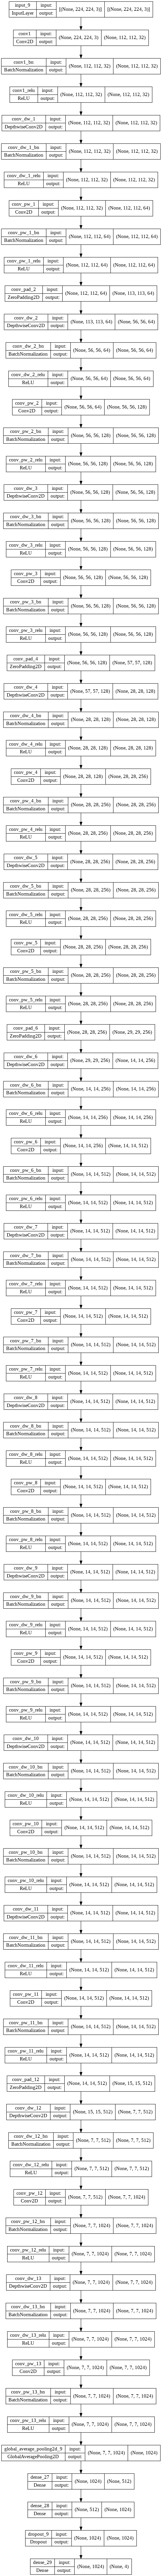

In [ ]:
# plot the model including the sizes of the model
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=30)

Epoch 1/30
30/30 [==============================] - 10s 326ms/step - loss: 0.4674 - accuracy: 0.8344 - val_loss: 0.4018 - val_accuracy: 0.8375
Epoch 2/30
30/30 [==============================] - 10s 324ms/step - loss: 0.3964 - accuracy: 0.8542 - val_loss: 0.2490 - val_accuracy: 0.9292
Epoch 3/30
30/30 [==============================] - 10s 323ms/step - loss: 0.3625 - accuracy: 0.8771 - val_loss: 0.3451 - val_accuracy: 0.8625
Epoch 4/30
30/30 [==============================] - 10s 337ms/step - loss: 0.3376 - accuracy: 0.8656 - val_loss: 0.2477 - val_accuracy: 0.9208
Epoch 5/30
30/30 [==============================] - 10s 324ms/step - loss: 0.2699 - accuracy: 0.8979 - val_loss: 0.1961 - val_accuracy: 0.9250
Epoch 6/30
30/30 [==============================] - 10s 324ms/step - loss: 0.3155 - accuracy: 0.8823 - val_loss: 0.2413 - val_accuracy: 0.9083
Epoch 7/30
30/30 [==============================] - 10s 322ms/step - loss: 0.2124 - accuracy: 0.9187 - val_loss: 0.2099 - val_accuracy: 0.9250

In [ ]:
tfjs.converters.save_keras_model(model,'/content/drive/MyDrive')

In [ ]:
model.evaluate(testx,testy)

8/8 [==============================] - 0s 41ms/step - loss: 0.1569 - accuracy: 0.9500


[0.15687164664268494, 0.949999988079071]

In [ ]:
model.save('/content/drive/MyDrive/modelmobilenet.h5')

In [ ]:
model  = tf.keras.models.load_model('/content/drive/MyDrive/modelmobilenet.h5')

In [ ]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        63
           1       0.94      0.92      0.93        64
           2       0.98      0.92      0.95        51
           3       0.97      0.98      0.98        62

    accuracy                           0.95       240
   macro avg       0.95      0.95      0.95       240
weighted avg       0.95      0.95      0.95       240



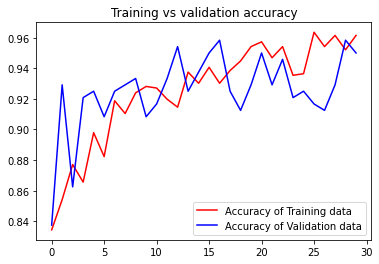

<Figure size 432x288 with 0 Axes>

In [ ]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

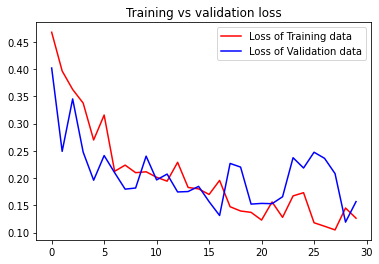

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
y_true = np.argmax(testy, axis=1)
y_true

conf_brain_tumor = confusion_matrix(y_true=y_true, y_pred=y_pred)

ValueError: ignored

In [ ]:
 y_pred = model.predict(np.expand_dims(testx,-1))
y_pred = np.argmax(y_pred, axis=1)
# y_test = np.expand_dims(y_test,-1)
y_true = np.argmax(testy, axis=1)
y_true

conf_brain_tumor = confusion_matrix(y_true=y_true, y_pred=y_pred)

8/8 [==============================] - 1s 42ms/step


[Text(0, 0.5, 'no tumor'),
 Text(0, 1.5, 'pituitary tumor'),
 Text(0, 2.5, 'meningioma tumor'),
 Text(0, 3.5, 'glioma tumor')]

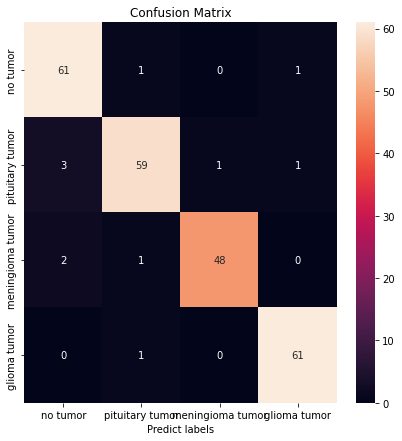

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_brain_tumor, annot= True, ax = ax)

ax.set_xlabel('Predict labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['no tumor','pituitary tumor', 'meningioma tumor', 'glioma tumor'])
ax.yaxis.set_ticklabels(['no tumor','pituitary tumor', 'meningioma tumor', 'glioma tumor'])

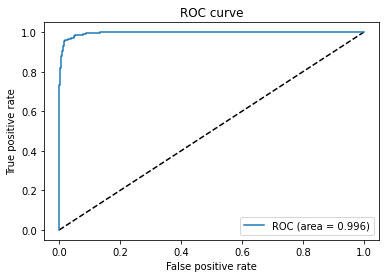

In [ ]:
# pred = model.predict(np.expand_dims(testx,-1))
# fpr, tpr, thresholds = roc_curve(testy.ravel(), pred.ravel())
# auc_ = auc(fpr, tpr)

# plt.figure(1)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_))
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve')
# plt.legend(loc='best')
# plt.show()

In [ ]:
Y_pred = model.predict(testx)

In [ ]:
n_classes = 4
lw = 2
Y_val = testy
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_val[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_val.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  import sys


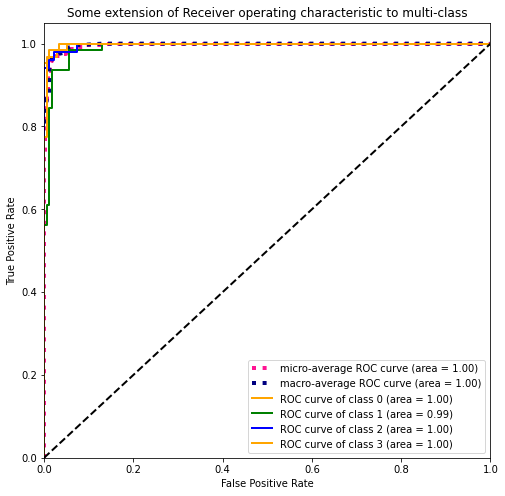

In [ ]:
# Pertama-tama, gabungkan semua False Positive Rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Kemudian interpolasi semua kurva ROC pada titik ini
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Terakhir, rata-rata dan hitung AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot semua kurva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['orange', 'green', 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

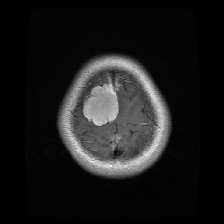

In [ ]:
load_img("/content/drive/MyDrive/BrainTumor3/meningioma_tumor/m (137).jpg",target_size=(224,224))

In [ ]:
image=load_img("/content/drive/MyDrive/BrainTumor3/meningioma_tumor/m (137).jpg",target_size=(224,224))

image=img_to_array(image)
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [ ]:
reverse_mapping={0:'glioma_tumor', 1:'meningioma_tumor', 2:'no_tumor', 3:'pituitary_tumor'}

def mapper(value):
    return reverse_mapping[value]

prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Prediction is meningioma_tumor.


***DENSENET201***

In [ ]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(224,224,3),include_top=False,weights='imagenet')
pretrained_model3.trainable = False

74850304/74836368 [==============================] - 1s 0us/step


In [ ]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.GlobalAveragePooling2D()(pretrained_model3.output)
x3 = tf.keras.layers.Dense(512, activation='relu')(x3)
x3 = tf.keras.layers.Dense(1024, activation='relu')(x3)
x3 = tf.keras.layers.Dropout(0.8)(x3)
outputs3 = tf.keras.layers.Dense(4, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [ ]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=30)

Epoch 1/30
30/30 [==============================] - 39s 571ms/step - loss: 1.2007 - accuracy: 0.5344 - val_loss: 0.5329 - val_accuracy: 0.7917
Epoch 2/30
30/30 [==============================] - 12s 408ms/step - loss: 0.6781 - accuracy: 0.7448 - val_loss: 0.3918 - val_accuracy: 0.8917
Epoch 3/30
30/30 [==============================] - 12s 399ms/step - loss: 0.5745 - accuracy: 0.8010 - val_loss: 0.3302 - val_accuracy: 0.8750
Epoch 4/30
30/30 [==============================] - 12s 398ms/step - loss: 0.4385 - accuracy: 0.8385 - val_loss: 0.2894 - val_accuracy: 0.9042
Epoch 5/30
30/30 [==============================] - 12s 408ms/step - loss: 0.4079 - accuracy: 0.8490 - val_loss: 0.3027 - val_accuracy: 0.9000
Epoch 6/30
30/30 [==============================] - 12s 396ms/step - loss: 0.3707 - accuracy: 0.8625 - val_loss: 0.2580 - val_accuracy: 0.8917
Epoch 7/30
30/30 [==============================] - 12s 403ms/step - loss: 0.3473 - accuracy: 0.8698 - val_loss: 0.2807 - val_accuracy: 0.8958

In [ ]:
model.evaluate(testx,testy)

8/8 [==============================] - 1s 149ms/step - loss: 0.2006 - accuracy: 0.9250


[0.20064277946949005, 0.925000011920929]

In [ ]:
model.save('/content/drive/MyDrive/modeldensenet201.h5')

In [ ]:
model_densenet201 = tf.keras.models.load_model('/content/drive/MyDrive/modeldensenet201.h5')

In [ ]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

8/8 [==============================] - 0s 42ms/step
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        63
           1       0.95      0.92      0.94        64
           2       0.98      0.94      0.96        51
           3       0.97      0.98      0.98        62

    accuracy                           0.95       240
   macro avg       0.96      0.95      0.95       240
weighted avg       0.95      0.95      0.95       240



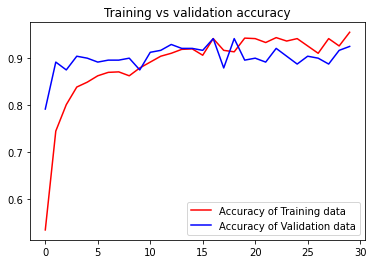

<Figure size 432x288 with 0 Axes>

In [ ]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

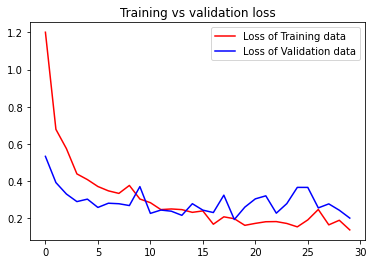

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
y_pred = model.predict(np.expand_dims(testx,-1))
y_pred = np.argmax(y_pred, axis=1)
# y_test = np.expand_dims(y_test,-1)
y_true = np.argmax(testy, axis=1)
y_true

conf_brain_tumor = confusion_matrix(y_true=y_true, y_pred=y_pred)

8/8 [==============================] - 0s 40ms/step


[Text(0, 0.5, 'no tumor'),
 Text(0, 1.5, 'pituitary tumor'),
 Text(0, 2.5, 'meningioma tumor'),
 Text(0, 3.5, 'glioma tumor')]

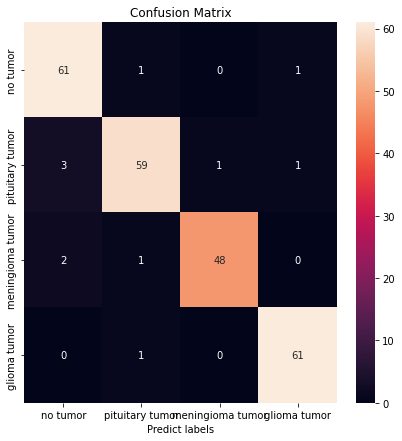

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_brain_tumor, annot= True, ax = ax)

ax.set_xlabel('Predict labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['no tumor','pituitary tumor', 'meningioma tumor', 'glioma tumor'])
ax.yaxis.set_ticklabels(['no tumor','pituitary tumor', 'meningioma tumor', 'glioma tumor'])

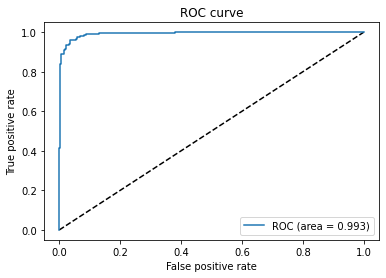

In [ ]:
# from sklearn.metrics import roc_curve, auc
# pred = model.predict(np.expand_dims(testx,-1))
# fpr, tpr, thresholds = roc_curve(testy.ravel(), pred.ravel())
# auc_ = auc(fpr, tpr)

# plt.figure(1)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_))
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve')
# plt.legend(loc='best')
# plt.show()

In [ ]:
Y_pred = model_densenet201.predict(testx)

8/8 [==============================] - 16s 398ms/step


In [ ]:
n_classes = 4
lw = 2
Y_val = testy
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_val[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_val.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  import sys


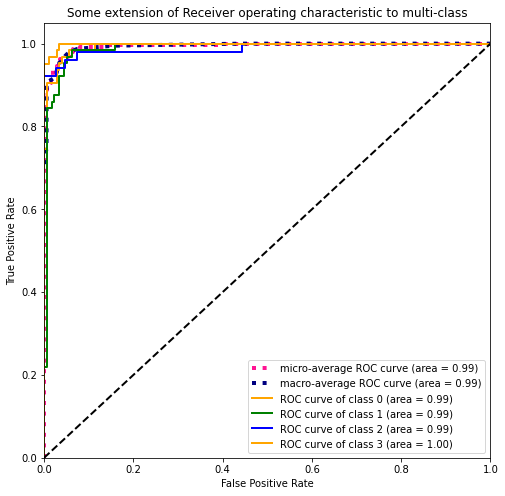

In [ ]:
# Pertama-tama, gabungkan semua False Positive Rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Kemudian interpolasi semua kurva ROC pada titik ini
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Terakhir, rata-rata dan hitung AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot semua kurva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['orange', 'green', 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

***VGG16***

In [ ]:
pretrained_model3 = tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
pretrained_model3.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.GlobalAveragePooling2D()(pretrained_model3.output)
x3 = tf.keras.layers.Dense(512, activation='relu')(x3)
x3 = tf.keras.layers.Dense(1024, activation='relu')(x3)
x3 = tf.keras.layers.Dropout(0.8)(x3)
outputs3 = tf.keras.layers.Dense(4, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=30,callbacks=[callbacks])

Epoch 1/30
30/30 [==============================] - 27s 450ms/step - loss: 1.4721 - accuracy: 0.2969 - val_loss: 1.1720 - val_accuracy: 0.5875
Epoch 2/30
30/30 [==============================] - 12s 392ms/step - loss: 1.1633 - accuracy: 0.5115 - val_loss: 0.9252 - val_accuracy: 0.6958
Epoch 3/30
30/30 [==============================] - 12s 395ms/step - loss: 1.0044 - accuracy: 0.5938 - val_loss: 0.7831 - val_accuracy: 0.7583
Epoch 4/30
30/30 [==============================] - 12s 397ms/step - loss: 0.9341 - accuracy: 0.6354 - val_loss: 0.6537 - val_accuracy: 0.8083
Epoch 5/30
30/30 [==============================] - 12s 395ms/step - loss: 0.8099 - accuracy: 0.6833 - val_loss: 0.6823 - val_accuracy: 0.7333
Epoch 6/30
30/30 [==============================] - 13s 417ms/step - loss: 0.7186 - accuracy: 0.7396 - val_loss: 0.5097 - val_accuracy: 0.8500
Epoch 7/30
30/30 [==============================] - 12s 397ms/step - loss: 0.6504 - accuracy: 0.7729 - val_loss: 0.6253 - val_accuracy: 0.7667

In [ ]:
model.evaluate(testx,testy)

8/8 [==============================] - 1s 149ms/step - loss: 0.3971 - accuracy: 0.8625


[0.397084504365921, 0.862500011920929]

In [ ]:
model.save('/content/drive/MyDrive/modelvgg16.h5')

In [ ]:
model_vgg16 = tf.keras.models.load_model('/content/drive/MyDrive/modelvgg16.h5')

In [ ]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.70      0.98      0.82        63
           1       0.92      0.75      0.83        64
           2       0.98      0.86      0.92        51
           3       0.96      0.85      0.91        62

    accuracy                           0.86       240
   macro avg       0.89      0.86      0.87       240
weighted avg       0.89      0.86      0.87       240



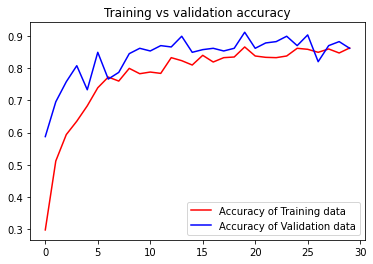

<Figure size 432x288 with 0 Axes>

In [ ]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

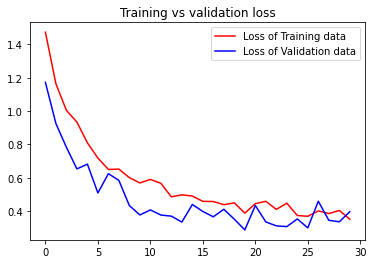

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
y_pred = model.predict(np.expand_dims(testx,-1))
y_pred = np.argmax(y_pred, axis=1)
# y_test = np.expand_dims(y_test,-1)
y_true = np.argmax(testy, axis=1)
y_true

conf_brain_tumor = confusion_matrix(y_true=y_true, y_pred=y_pred)

8/8 [==============================] - 0s 40ms/step


[Text(0, 0.5, 'no tumor'),
 Text(0, 1.5, 'pituitary tumor'),
 Text(0, 2.5, 'meningioma tumor'),
 Text(0, 3.5, 'glioma tumor')]

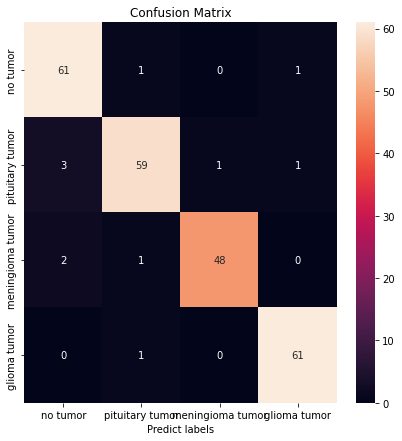

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_brain_tumor, annot= True, ax = ax)

ax.set_xlabel('Predict labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['no tumor','pituitary tumor', 'meningioma tumor', 'glioma tumor'])
ax.yaxis.set_ticklabels(['no tumor','pituitary tumor', 'meningioma tumor', 'glioma tumor'])

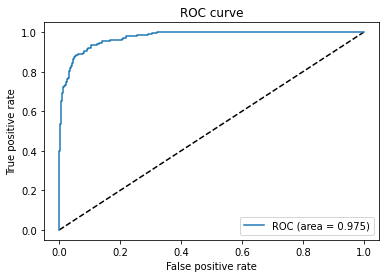

In [ ]:
from sklearn.metrics import roc_curve, auc
pred = model.predict(np.expand_dims(testx,-1))
fpr, tpr, thresholds = roc_curve(testy.ravel(), pred.ravel())
auc_ = auc(fpr, tpr)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

***NASNetLarge***

In [ ]:
dataset=[]
mapping={'no_tumor':0, 'pituitary_tumor':1, 'meningioma_tumor':2, 'glioma_tumor':3}
count=0

for file in os.listdir(directory):
    path=os.path.join(directory,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(331,331))
        image=img_to_array(image)
        image=image/255.0
        dataset.append([image,count])
    count=count+1

In [ ]:
len(dataset)

1200

In [ ]:
data,labels0=zip(*dataset)

In [ ]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)
print(data.shape)
print(labels.shape)

(1200, 331, 331, 3)
(1200, 4)


In [ ]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(960, 331, 331, 3)
(240, 331, 331, 3)
(960, 4)
(240, 4)


In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                    width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [ ]:
pretrained_model3 = tf.keras.applications.NASNetLarge(input_shape=(331,331,3),include_top=False,weights='imagenet')
pretrained_model3.trainable = False

In [ ]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.GlobalAveragePooling2D()(pretrained_model3.output)
x3 = tf.keras.layers.Dense(512, activation='relu')(x3)
x3 = tf.keras.layers.Dense(1024, activation='relu')(x3)
x3 = tf.keras.layers.Dropout(0.8)(x3)
outputs3 = tf.keras.layers.Dense(4, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 331, 331, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv1 (Conv2D)            (None, 165, 165, 96  2592        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn1 (BatchNormalization)  (None, 165, 165, 96  384         ['stem_conv1[0][0]']             
                                )                                                             

In [ ]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=30)

Epoch 1/30
30/30 [==============================] - 62s 1s/step - loss: 1.1954 - accuracy: 0.5333 - val_loss: 0.5769 - val_accuracy: 0.8000
Epoch 2/30
30/30 [==============================] - 38s 1s/step - loss: 0.6662 - accuracy: 0.7531 - val_loss: 0.4769 - val_accuracy: 0.7958
Epoch 3/30
30/30 [==============================] - 37s 1s/step - loss: 0.6014 - accuracy: 0.7729 - val_loss: 0.4064 - val_accuracy: 0.8375
Epoch 4/30
30/30 [==============================] - 38s 1s/step - loss: 0.5178 - accuracy: 0.8083 - val_loss: 0.3604 - val_accuracy: 0.8667
Epoch 5/30
30/30 [==============================] - 37s 1s/step - loss: 0.4453 - accuracy: 0.8302 - val_loss: 0.3883 - val_accuracy: 0.8667
Epoch 6/30
30/30 [==============================] - 37s 1s/step - loss: 0.4204 - accuracy: 0.8448 - val_loss: 0.3634 - val_accuracy: 0.8750
Epoch 7/30
30/30 [==============================] - 37s 1s/step - loss: 0.3613 - accuracy: 0.8583 - val_loss: 0.3435 - val_accuracy: 0.8750
Epoch 8/30
30/30 [==

In [ ]:
model.evaluate(testx,testy)

8/8 [==============================] - 7s 803ms/step - loss: 0.2531 - accuracy: 0.9167


[0.25306522846221924, 0.9166666865348816]

In [ ]:
model.save('/content/drive/MyDrive/modelnasnetlarge.h5')

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/modelnasnetlarge.h5')

In [ ]:
# plot the model including the sizes of the model
tf.keras.utils.plot_model(model_inceptionresnetv2, show_shapes=True)

In [ ]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

8/8 [==============================] - 16s 957ms/step
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.87      0.94      0.90        64
           2       0.94      0.92      0.93        51
           3       0.95      0.87      0.91        62

    accuracy                           0.93       240
   macro avg       0.93      0.92      0.93       240
weighted avg       0.93      0.93      0.92       240



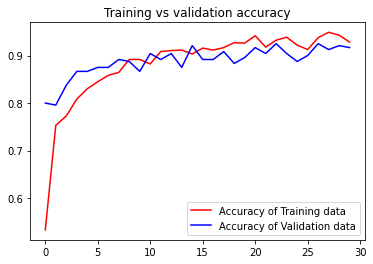

<Figure size 432x288 with 0 Axes>

In [ ]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

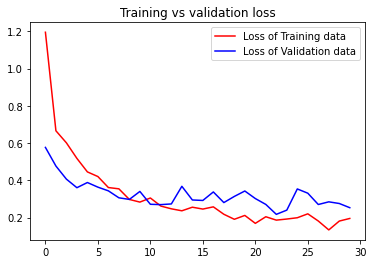

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
y_pred = model.predict(testx)
y_pred = np.argmax(y_pred, axis=1)
# y_test = np.expand_dims(y_test,-1)
y_true = np.argmax(testy, axis=1)
y_true

conf_brain_tumor = confusion_matrix(y_true=y_true, y_pred=y_pred)

8/8 [==============================] - 6s 827ms/step


[Text(0, 0.5, 'no tumor'),
 Text(0, 1.5, 'pituitary tumor'),
 Text(0, 2.5, 'meningioma tumor'),
 Text(0, 3.5, 'glioma tumor')]

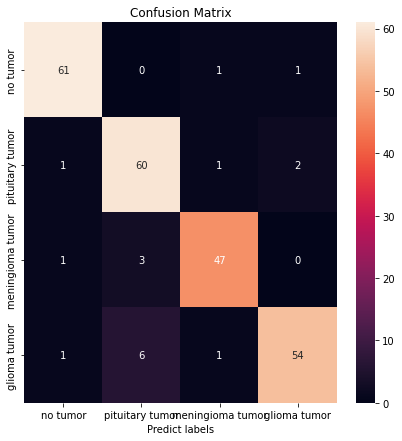

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_brain_tumor, annot= True, ax = ax)

ax.set_xlabel('Predict labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['no tumor','pituitary tumor', 'meningioma tumor', 'glioma tumor'])
ax.yaxis.set_ticklabels(['no tumor','pituitary tumor', 'meningioma tumor', 'glioma tumor'])

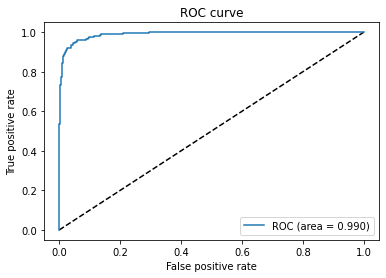

In [ ]:
from sklearn.metrics import roc_curve, auc
pred = model.predict(np.expand_dims(testx,-1))
fpr, tpr, thresholds = roc_curve(testy.ravel(), pred.ravel())
auc_ = auc(fpr, tpr)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
y_pred = model_nasnetlarge.predict(testx)

8/8 [==============================] - 11s 799ms/step


In [ ]:
n_classes = 4
lw = 2
Y_val = testy
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_val[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_val.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  import sys


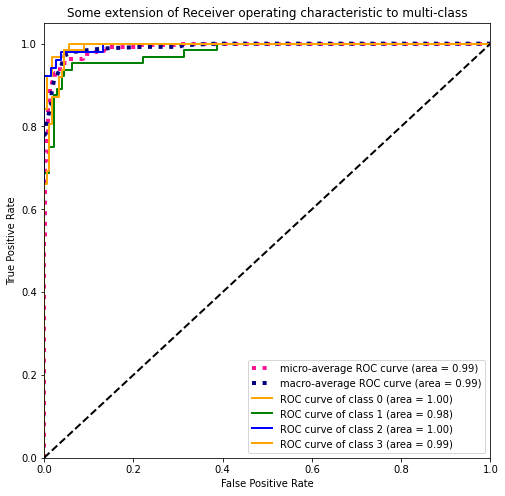

In [ ]:
# Pertama-tama, gabungkan semua False Positive Rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Kemudian interpolasi semua kurva ROC pada titik ini
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Terakhir, rata-rata dan hitung AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot semua kurva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['orange', 'green', 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()